In [2]:
!pip install soccerplots

You should consider upgrading via the '/Users/michaelnazarian/opt/anaconda3/bin/python3 -m pip install --upgrade pip' command.


In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer.pitch import Pitch, add_image
from matplotlib.colors import to_rgba
import seaborn as sns
from PIL import Image
from urllib.request import urlopen
from soccerplots.radar_chart import Radar

In [121]:
pd.set_option("display.max_rows", 11)
pd.set_option("display.max_columns", 40)
pd.set_option("display.width", None)

#read in data
df = pd.read_csv("Passing Radar.csv")
df

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Att,Cmp%,PrgDist,Shrt Cmp%,Med Cmp%,Long Cmp%,Ast,xA,A-xA,Key Passes,Final 1/3,PenBoxPasses,CrsPenBox,Prog,Matches
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,30-189,1990,14.7,58.9,79.7,359.2,88.9,80.7,52.6,0.07,0.05,0.01,0.75,3.54,1.50,0.27,5.65,Matches
1,2,Tammy Abraham,eng ENG,FW,Chelsea,23-155,1997,11.3,18.9,68.7,28.9,77.6,62.9,60.0,0.09,0.08,0.01,0.71,1.06,0.18,0.00,0.97,Matches
2,3,Che Adams,eng ENG,FW,Southampton,24-236,1996,21.2,21.7,69.3,54.0,75.8,75.4,74.0,0.19,0.20,-0.01,1.08,0.99,0.61,0.00,1.93,Matches
3,4,Tosin Adarabioyo,eng ENG,DF,Fulham,23-163,1997,23.0,55.2,86.5,372.8,89.1,93.6,73.0,0.00,0.00,0.00,0.13,2.43,0.13,0.00,2.39,Matches
4,5,Adrián,es ESP,GK,Liverpool,34-062,1987,3.0,33.0,76.8,375.7,100.0,97.2,48.8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,495,Chris Wood,nz NZL,FW,Burnley,29-089,1991,19.9,20.3,67.3,24.5,72.2,68.1,56.3,0.00,0.05,-0.05,0.70,0.65,0.20,0.00,1.01,Matches
495,496,Granit Xhaka,ch SUI,MF,Arsenal,28-160,1992,20.1,71.8,89.3,322.1,91.0,93.2,81.9,0.10,0.06,0.04,0.60,8.56,1.19,0.00,7.51,Matches
496,497,Andriy Yarmolenko,ua UKR,"FW,MF",West Ham,31-134,1989,4.0,34.8,79.1,132.5,87.0,72.3,75.0,0.25,0.25,0.00,1.25,2.50,1.00,0.25,2.50,Matches
497,498,DeAndre Yedlin,us USA,DF,Newcastle Utd,27-240,1993,4.8,35.8,64.5,168.5,80.3,65.5,35.5,0.00,0.02,-0.02,0.63,1.04,1.25,0.21,2.71,Matches


In [122]:
#Filter for specified players
playerlist = ["Kevin De Bruyne", "Bruno Fernandes"]
playerdf = df[df.Player.isin(playerlist)].reset_index()
#df = df[(df["Player"]=="Kevin De Bruyne") | (df["Player"]=="Bruno Fernandes")].reset_index()
playerdf

,index,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Att,Cmp%,PrgDist,Shrt Cmp%,Med Cmp%,Long Cmp%,Ast,xA,A-xA,Key Passes,Final 1/3,PenBoxPasses,CrsPenBox,Prog,Matches
0,111,112,Kevin De Bruyne,be BEL,MF,Manchester City,29-251,1991,18.4,63.5,75.7,272.7,84.8,82.1,60.0,0.60,0.40,0.20,3.26,5.87,3.37,0.33,7.72,Matches
1,141,142,Bruno Fernandes,pt POR,MF,Manchester Utd,26-179,1994,25.4,66.5,73.7,281.5,83.5,80.7,57.1,0.39,0.37,0.02,2.95,5.51,2.91,0.28,6.97,Matches


In [123]:
#Drop column names not needed
playerdf = playerdf.drop(["index", "90s", "Born", "Rk", "Nation", "Pos", "Squad", "Age", "Matches"], axis=1)
playerdf

,Player,Att,Cmp%,PrgDist,Shrt Cmp%,Med Cmp%,Long Cmp%,Ast,xA,A-xA,Key Passes,Final 1/3,PenBoxPasses,CrsPenBox,Prog
0,Kevin De Bruyne,63.5,75.7,272.7,84.8,82.1,60.0,0.60,0.40,0.20,3.26,5.87,3.37,0.33,7.72
1,Bruno Fernandes,66.5,73.7,281.5,83.5,80.7,57.1,0.39,0.37,0.02,2.95,5.51,2.91,0.28,6.97


In [124]:
#List with column names, index with 2 to start with not 90s
params = list(playerdf.columns)
params = params[2:]

In [125]:
#add ranges to list of tuple pairs
ranges = []
a_values = []
b_values = []

for x in params:
    a = min(playerdf[params][x])
    a = a - (a*.25)
    
    b = max(playerdf[params][x])
    b = b + (b*.25)
    
    ranges.append((a,b))
    
for x in range(len(playerdf["Player"])):
    if playerdf["Player"][x] == "Kevin De Bruyne":
        a_values = playerdf.iloc[x].values.tolist()
    if playerdf["Player"][x] == "Bruno Fernandes":
        b_values = playerdf.iloc[x].values.tolist()

a_values = a_values[1:]
b_values = b_values[1:]

values = [a_values, b_values]
values

[[63.5,
  75.7,
  272.7,
  84.8,
  82.1,
  60.0,
  0.6,
  0.4,
  0.2,
  3.26,
  5.87,
  3.37,
  0.33,
  7.72],
 [66.5,
  73.7,
  281.5,
  83.5,
  80.7,
  57.1,
  0.39,
  0.37,
  0.02,
  2.95,
  5.51,
  2.91,
  0.28,
  6.97]]

In [126]:
#Title
#For some reason must have _ for 2nd title
title = dict(
    title_name = "Kevin De Bruyne",
    title_color = "lightblue",
    subtitle_name = "Manchester City",
    subtitle_color = "lightblue",
    title_name_2 = "Bruno Fernandes",
    title_color_2 = "red",
    subtitle_name_2 = "Manchester United",
    subtitle_color_2 = "red",
    title_fontsize = 18,
    subtitle_fontsize=15
)

endnote = "Created By: @Mnazarian10\nCredit To: @mckayjohns & @slothfulwave612\ndata via FBRef / StatsBomb"

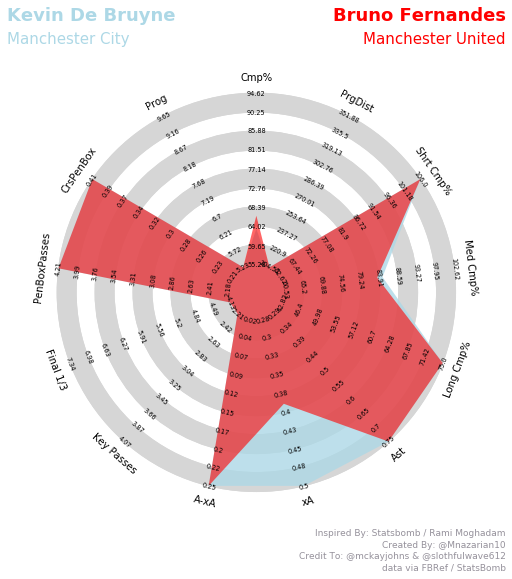

In [127]:
radar = Radar()

fig,ax = radar.plot_radar(ranges=ranges,params=params,values=values, radar_color=["lightblue", "red"], 
                          alphas=[.8,.6], title=title, endnote=endnote, compare=True)